In [61]:
import pandas as pd

# Load dataset
df = pd.read_csv("Confirmed Exoplanet (Planetary System).csv")
df.columns


Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2

**Check Availability of required features**

In [62]:
# Mapping required features to actual dataset column names
required_cols = {
    "planet_radius": "pl_rade",
    "planet_mass": "pl_bmasse",
    "surface_temperature": "pl_eqt",
    "orbital_period": "pl_orbper",
    "distance_from_star": "pl_orbsmax",
    "host_star_type": "st_spectype",
    "host_star_temperature": "st_teff",
    "host_star_metallicity": "st_met",
}

# Check availability
available = {k: v for k, v in required_cols.items() if v in df.columns}
# Extract available columns
extract_cols = list(available.values())
extracted_df = df[extract_cols]

print("\nExtracted Feature Dataset (first 5 rows):")
print(extracted_df.head())


Extracted Feature Dataset (first 5 rows):
   pl_rade   pl_bmasse  pl_eqt  pl_orbper  pl_orbsmax st_spectype  st_teff  \
0      NaN  6165.60000     NaN  326.03000       1.290      G8 III   4742.0   
1      NaN  5434.70000     NaN        NaN       1.210         NaN      NaN   
2      NaN  4914.89849     NaN  323.21000       1.178      G8 III   4874.0   
3      NaN  4684.81420     NaN  516.21997       1.530         NaN   4213.0   
4      NaN  3337.07000     NaN  516.22000       1.540      K4 III   4340.0   

   st_met  
0   -0.35  
1     NaN  
2   -0.26  
3   -0.02  
4    0.04  


**Drop the rows  with ANY null values**

In [63]:

clean_df = extracted_df.dropna()
print("\nRows before cleaning:", len(extracted_df))
print("Rows after cleaning:", len(clean_df))



Rows before cleaning: 38170
Rows after cleaning: 591


**Save clean dataset**

In [64]:

output_path = "clean_exoplanet_features.csv"
clean_df.to_csv(output_path, index=False)
print(f"\nClean dataset saved successfully to: {output_path}")
print(clean_df.head())


Clean dataset saved successfully to: clean_exoplanet_features.csv
     pl_rade   pl_bmasse  pl_eqt     pl_orbper  pl_orbsmax st_spectype  \
191    2.230    16.30000   546.0  4.168550e+01      0.2410           G   
236   12.442  2002.31896   434.0  4.020000e+08   7506.0000        M3 V   
247   10.870   874.00000   600.0  1.324060e+01      0.1055        K1 V   
250   16.030   740.51000  1657.0  2.994330e+00      0.0436        F6 V   
266    9.920   415.70400  1700.0  4.035190e+00      0.0510        G0 V   

     st_teff  st_met  
191   5766.0   -0.15  
236   3406.0    0.00  
247   5075.0    0.26  
250   6440.0   -0.03  
266   5945.0    0.01  


**Load clean dataset**

In [65]:
import pandas as pd
import numpy as np

df = pd.read_csv("clean_exoplanet_features.csv")


**Outlier handling using IQR (safe & standard)**

In [66]:
numeric_cols = [
    "pl_rade",
    "pl_bmasse",
    "pl_eqt",
    "pl_orbper",
    "pl_orbsmax",
    "st_teff",
    "st_met"
]


In [67]:
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [68]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in numeric_cols:
    df = remove_outliers_iqr(df, col)


**Encode categorical features (One-Hot Encoding)**

In [69]:
df = pd.get_dummies(df, columns=["st_spectype"], prefix="star")


**Feature Engineering**

**A.Habitability Score Index**

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()

df[["pl_rade_norm", "pl_eqt_norm", "pl_orbsmax_norm"]] = scaler_mm.fit_transform(
    df[["pl_rade", "pl_eqt", "pl_orbsmax"]]
)

df["habitability_index"] = (
    0.4 * (1 - df["pl_rade_norm"]) +
    0.4 * (1 - df["pl_eqt_norm"]) +
    0.2 * (1 - df["pl_orbsmax_norm"])
)


In [71]:
print(df["habitability_index"].describe())


count    444.000000
mean       0.597203
std        0.187865
min        0.144364
25%        0.442212
50%        0.599858
75%        0.766820
max        0.941942
Name: habitability_index, dtype: float64


**B. Stellar Compatibility Index**

In [72]:
# -----------------------------
# Stellar Compatibility Index
# -----------------------------

# Star temperature score (Sun ≈ 5778 K)
df["star_temp_score"] = 1 - abs(df["st_teff"] - 5778) / df["st_teff"].max()

# Star metallicity score (Solar ≈ 0)
df["star_met_score"] = 1 - abs(df["st_met"]) / df["st_met"].abs().max()

# Weighted stellar compatibility index
df["stellar_compatibility_index"] = (
    0.6 * df["star_temp_score"] +
    0.4 * df["star_met_score"]
)

# Ensure score stays within [0, 1]
df["stellar_compatibility_index"] = df["stellar_compatibility_index"].clip(0, 1)


**Normalize numerical features**

In [73]:
from sklearn.preprocessing import StandardScaler

scale_cols = [
     "pl_rade",
    "pl_bmasse",
    "pl_eqt",
    "pl_orbper",
    "pl_orbsmax",
    "st_teff",
    "st_met"]

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])


**Validate data quality (Statistics & Visualization)**

            pl_rade     pl_bmasse        pl_eqt     pl_orbper    pl_orbsmax  \
count  4.440000e+02  4.440000e+02  4.440000e+02  4.440000e+02  4.440000e+02   
mean  -6.401286e-17  1.040209e-16  6.401286e-17  6.401286e-17  4.800964e-17   
std    1.001128e+00  1.001128e+00  1.001128e+00  1.001128e+00  1.001128e+00   
min   -1.336796e+00 -8.476870e-01 -1.814185e+00 -1.326151e+00 -1.902160e+00   
25%   -1.051223e+00 -8.098508e-01 -8.649746e-01 -6.429493e-01 -6.737522e-01   
50%    2.227522e-01 -3.929366e-01 -5.079878e-02 -3.083802e-01 -1.554831e-01   
75%    8.491242e-01  5.213129e-01  7.589090e-01  3.439756e-01  5.139925e-01   
max    2.041325e+00  3.365133e+00  2.626053e+00  4.069757e+00  2.790078e+00   

            st_teff        st_met  pl_rade_norm  pl_eqt_norm  pl_orbsmax_norm  \
count  4.440000e+02  4.440000e+02    444.000000   444.000000       444.000000   
mean   7.601527e-16 -4.800964e-17      0.395722     0.408578         0.405384   
std    1.001128e+00  1.001128e+00      0.2963

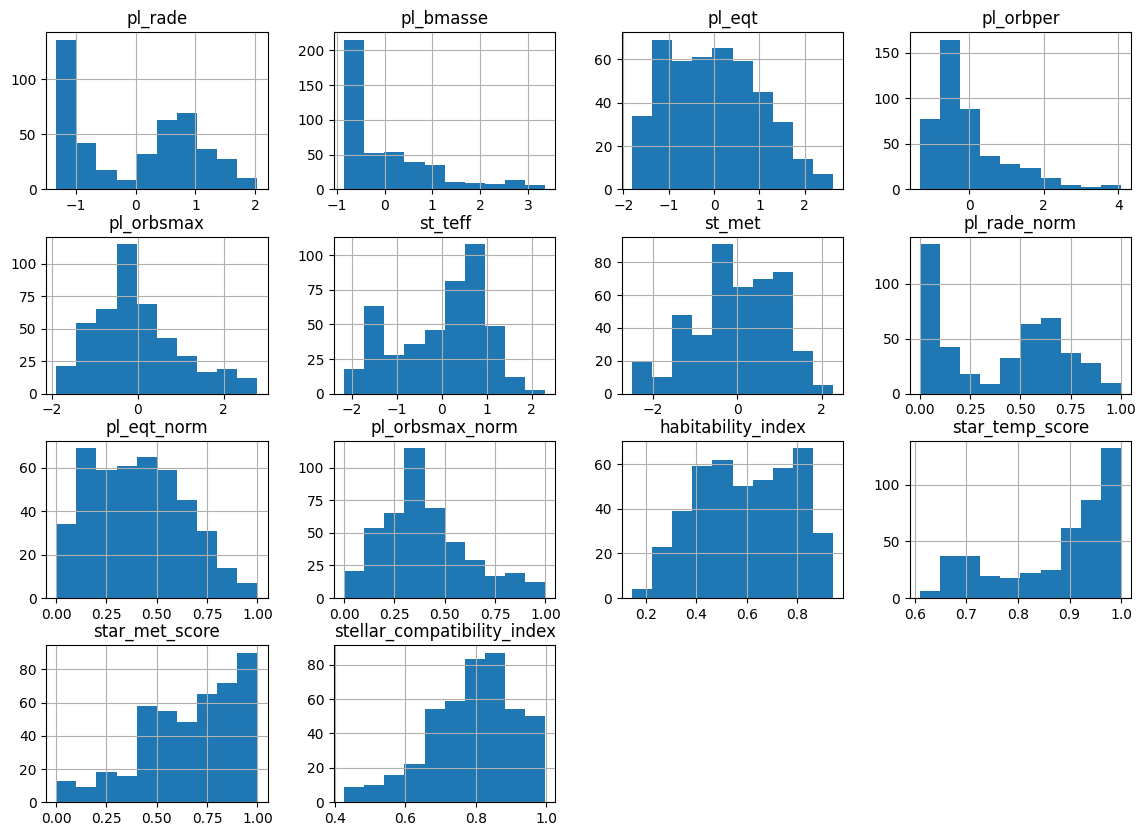

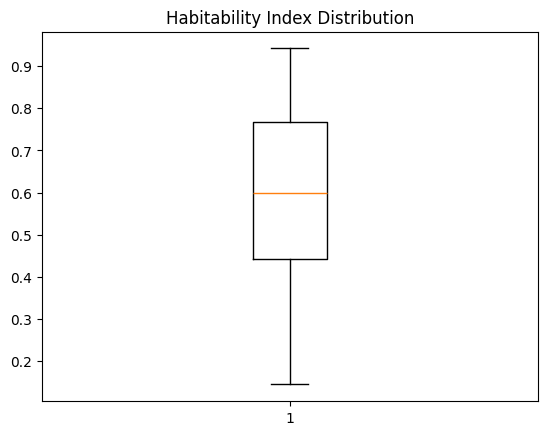

In [74]:
import matplotlib.pyplot as plt

# Statistics
print(df.describe())

# Histograms
df.hist(figsize=(14, 10))
plt.show()

# Boxplot for habitability
plt.boxplot(df["habitability_index"])
plt.title("Habitability Index Distribution")
plt.show()


**Save the final processed dataset**

In [75]:
df.to_csv("processed_exoplanet_features.csv", index=False)
print("Module 2 completed & dataset saved")


Module 2 completed & dataset saved


**Define Target Variable**

In [76]:
threshold = df["habitability_index"].quantile(0.75)
df["habitability_class"] = (df["habitability_index"] >= threshold).astype(int)

print("Threshold:", threshold)
print(df["habitability_class"].value_counts())


Threshold: 0.7668201014287144
habitability_class
0    333
1    111
Name: count, dtype: int64


**Feature Selection using Correlation**




In [77]:
# Compute correlation with target
corr = df.corr(numeric_only=True)["habitability_index"].abs().sort_values(ascending=False)

# Select top correlated features (excluding target itself)
selected_features = corr.index[1:10].tolist()
print("Selected Features:", selected_features)

Selected Features: ['pl_rade_norm', 'pl_rade', 'st_teff', 'pl_eqt_norm', 'pl_eqt', 'habitability_class', 'star_temp_score', 'pl_bmasse', 'stellar_compatibility_index']


In [78]:
# -----------------------------
# Prepare dataset
# -----------------------------

X = df[selected_features]
y = df["habitability_class"]
print("Features used:", X.columns.tolist())
print("Target shape:", y.shape)


Features used: ['pl_rade_norm', 'pl_rade', 'st_teff', 'pl_eqt_norm', 'pl_eqt', 'habitability_class', 'star_temp_score', 'pl_bmasse', 'stellar_compatibility_index']
Target shape: (444,)


**Train–Test Split (80:20)**

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Training samples: (355, 9)
Testing samples: (89, 9)


**ML Pipeline (Scaling + Model)**

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


**I Models for Habitability Prediction**

**Random Forest Classifier (Binary)**

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

rf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"
    ))
])

rf_pipeline.fit(X_train, y_train)

rf_pred = rf_pipeline.predict(X_test)
rf_prob = rf_pipeline.predict_proba(X_test)[:, 1]

print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1-score:", f1_score(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_prob))


Random Forest Results
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC-AUC: 1.0


**XGBoost Classifier (Optional – Multi-class Ready)**

In [82]:
try:
    from xgboost import XGBClassifier

    xgb_model = XGBClassifier(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        random_state=42
    )

    xgb_model.fit(X_train, y_train)

    xgb_pred = xgb_model.predict(X_test)
    xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

    print("\nXGBoost Results")
    print("Accuracy:", accuracy_score(y_test, xgb_pred))
    print("Precision:", precision_score(y_test, xgb_pred))
    print("Recall:", recall_score(y_test, xgb_pred))
    print("F1-score:", f1_score(y_test, xgb_pred))
    print("ROC-AUC:", roc_auc_score(y_test, xgb_prob))

except ImportError:
    print("XGBoost not installed. Skipping XGBoost model.")



XGBoost Results
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC-AUC: 1.0


**Logistic Regression (Baseline Comparison)**

In [83]:
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

lr_pipeline.fit(X_train, y_train)

lr_pred = lr_pipeline.predict(X_test)
lr_prob = lr_pipeline.predict_proba(X_test)[:, 1]

print("\nLogistic Regression Results")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred))
print("Recall:", recall_score(y_test, lr_pred))
print("F1-score:", f1_score(y_test, lr_pred))
print("ROC-AUC:", roc_auc_score(y_test, lr_prob))



Logistic Regression Results
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC-AUC: 1.0


**Rank Exoplanets by Predicted Habitability**

In [84]:
# Use Random Forest probabilities for ranking
df["predicted_habitability_score"] = rf_pipeline.predict_proba(X)[:, 1]

ranked_planets = df.sort_values(
    by="predicted_habitability_score",
    ascending=False
)

print("\nTop 10 Most Habitable Exoplanets (Predicted):")
print(ranked_planets[[
    "predicted_habitability_score",
    "habitability_index",
    "stellar_compatibility_index"
]].head(10))



Top 10 Most Habitable Exoplanets (Predicted):
    predicted_habitability_score  habitability_index  \
43                           1.0            0.821628   
42                           1.0            0.849765   
41                           1.0            0.886904   
40                           1.0            0.885665   
51                           1.0            0.820951   
52                           1.0            0.800860   
54                           1.0            0.870403   
55                           1.0            0.871154   
44                           1.0            0.801612   
48                           1.0            0.827954   

    stellar_compatibility_index  
43                     0.653563  
42                     0.610375  
41                     0.751114  
40                     0.685655  
51                     0.653563  
52                     0.652203  
54                     0.555286  
55                     0.574923  
44                     0.65220

** Save Final Ranked Dataset**

In [85]:
ranked_planets.to_csv("ranked_exoplanet_habitability.csv", index=False)
print("Module 3 & 4 completed. Ranked dataset saved.")


Module 3 & 4 completed. Ranked dataset saved.
